## Radiocarbon age models and linear regressions

In [1]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
# Import the radicoarbon data
df = pd.read_csv('~/Documents/GitHub/data/schiff radiocarbon 06-10-2020.csv')
df['distance'] = df['Distance microns']/1000

stetson = df[df['Coral'] == 'stet-4904-bc1-d5']
jack4684 = df[df['Coral'] == 'jack-4684-bc1']
stetson_old = df[df['Coral'] == 'stet-4904-bc1']
sav = df[df['Coral'] == 'sav-4902-bc1']
jack4907 = df[df['Coral'] == 'jack-4907-bc1-d1']
jack4686 = df[df['Coral'] == 'jack-4686-bc1-t1']

df

,Coral,ID 1,ID 2,Sample,Distance microns,Fraction modern,error,D14C,D14C.1,d13C,14C Age,error.1,Year analyzed,yrmin,yrmax,probability,error.2,distance
0,jack-4907-bc1-d1,NaN,Jacksonville Deep Water Coral 1105LEJK4907_17,2,95,0.8800,0.0041,-118.7,-124.6,-14.8,1010.0,35.0,2006,528.0,648.0,95.0,60.0,0.095
1,jack-4907-bc1-d1,NaN,Jacksonville Deep Water Coral 1105LEJK4907_18,7,236,0.8600,0.0032,-138.1,-143.9,-15.2,1190.0,30.0,2006,662.0,799.0,95.0,69.0,0.236
2,jack-4907-bc1-d1,NaN,Jacksonville Deep Water Coral 1105LEJK4907_1,11,512,0.8000,0.0028,-203.5,-208.9,-15.0,1830.0,30.0,2006,1294.0,1466.0,95.0,86.0,0.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,jack-4686-bc1-t1,NaN,NaN,"83,84,85",4080,0.9085,0.0019,-91.5,NaN,NaN,770.0,15.0,2020,317.0,478.0,99.0,161.0,4.080
96,jack-4686-bc1-t1,NaN,NaN,"106,107,108",5184,0.8862,0.0018,-113.8,NaN,NaN,970.0,15.0,2020,507.0,625.0,99.0,118.0,5.184
97,jack-4686-bc1-t1,NaN,NaN,"123,124,125",6000,0.8698,0.0017,-130.2,NaN,NaN,1120.0,15.0,2020,628.0,725.0,99.0,97.0,6.000


### Bomb spike figures.

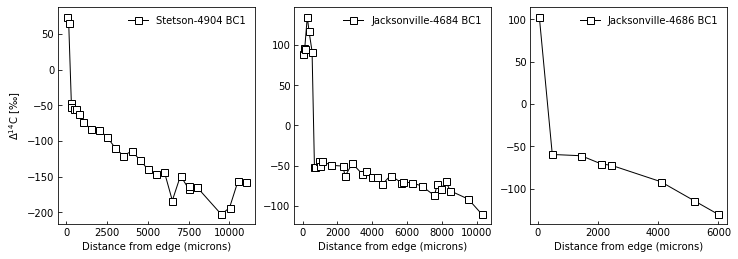

In [9]:
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (12,4))
markersize = 7
# ax1.plot('Distance microns', 'D14C', data=stetson_old, label = "Stetson-4904 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', 'D14C', data=stetson, label = "Stetson-4904 BC1",marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1, markersize = markersize)
ax3.plot('Distance microns', 'D14C', data=jack4684, label = "Jacksonville-4684 BC1", marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1, markersize = markersize)
ax4.plot('Distance microns', 'D14C', data=jack4686, label = "Jacksonville-4686 BC1", marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1, markersize = markersize)

ax2.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
# ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (microns)')
ax3.set_xlabel('Distance from edge (microns)')
ax4.set_xlabel('Distance from edge (microns)')

# ax1.tick_params(direction='in')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')
ax4.tick_params(direction='in')

# ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)
ax3.legend(frameon=False, loc = 0)
ax4.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_recent.png', dpi = 400, bbox_inches = 'tight')

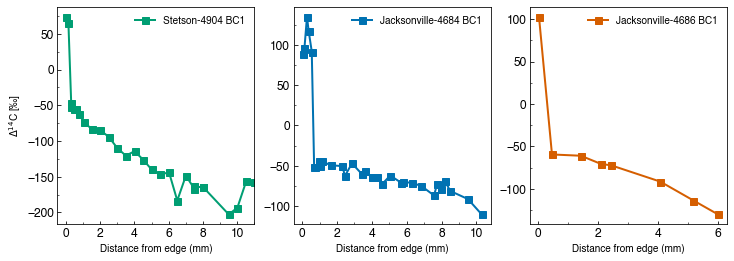

In [24]:
mpl.rc('font',family='Helvetica')
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (12,4))
markersize = 7
# ax1.plot('Distance microns', 'D14C', data=stetson_old, label = "Stetson-4904 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('distance', 'D14C', data=stetson, label = "Stetson-4904 BC1", marker = "s", color = '#009E73', linewidth = 2, markersize = markersize)
ax3.plot('distance', 'D14C', data=jack4684, label = "Jacksonville-4684 BC1", marker = "s", color = '#0072B2', linewidth = 2, markersize = markersize)
ax4.plot('distance', 'D14C', data=jack4686, label = "Jacksonville-4686 BC1", marker = "s", color = '#D55E00', linewidth = 2, markersize = markersize)

ax2.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
# ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (mm)')
ax3.set_xlabel('Distance from edge (mm)')
ax4.set_xlabel('Distance from edge (mm)')

ax2.set_xlim(-0.5,11)
# ax1.tick_params(direction='in')
ax2.tick_params(direction='in', which = 'both')
ax3.tick_params(direction='in', which = 'both')
ax4.tick_params(direction='in', which = 'both')

# ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)
ax3.legend(frameon=False, loc = 0)
ax4.legend(frameon=False, loc = 0)

size1=12
for tick in ax2.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax3.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax3.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax4.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax4.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
    
xminor = 1
yminor = 25

ax2.xaxis.set_minor_locator(MultipleLocator(xminor))
ax2.yaxis.set_minor_locator(MultipleLocator(yminor))
ax3.xaxis.set_minor_locator(MultipleLocator(xminor))
ax3.yaxis.set_minor_locator(MultipleLocator(yminor))
ax4.xaxis.set_minor_locator(MultipleLocator(xminor))
ax4.yaxis.set_minor_locator(MultipleLocator(yminor))


plt.savefig('fig_d14c_results_recent.png', dpi = 400, bbox_inches = 'tight')

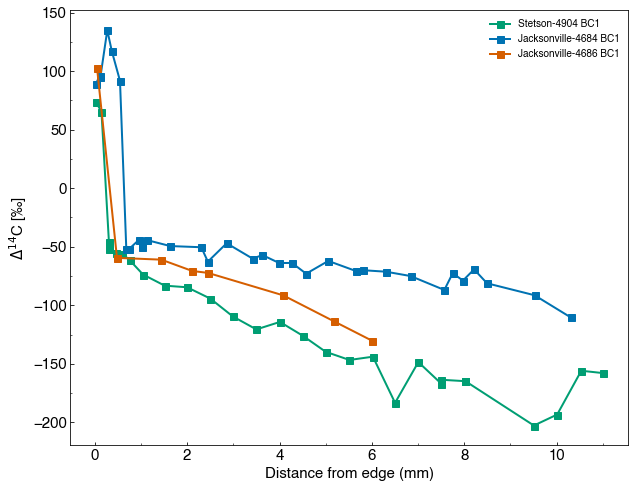

In [26]:
mpl.rc('font',family='Helvetica')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot('distance', 'D14C', data=stetson, label = "Stetson-4904 BC1", marker = "s", color = '#009E73', linewidth = 2, markersize = markersize)
ax.plot('distance', 'D14C', data=jack4684, label = "Jacksonville-4684 BC1", marker = "s", color = '#0072B2', linewidth = 2, markersize = markersize)
ax.plot('distance', 'D14C', data=jack4686, label = "Jacksonville-4686 BC1", marker = "s", color = '#D55E00', linewidth = 2, markersize = markersize)

ax.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]", size = 15)
ax.set_xlabel('Distance from edge (mm)',size = 15)

ax.tick_params(direction='in', which = 'both')
ax.legend(frameon=False, loc = 0)

size1 = 15
for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
xminor = 1
yminor = 25

ax.xaxis.set_minor_locator(MultipleLocator(xminor))
ax.yaxis.set_minor_locator(MultipleLocator(yminor))

In [5]:
df.Coral.unique()

array(['jack-4907-bc1-d1', 'stet-4904-bc1', 'sav-4902-bc1',
       'jack-4684-bc1', 'stet-4904-bc1-d5'], dtype=object)

### Ancient D14C figures

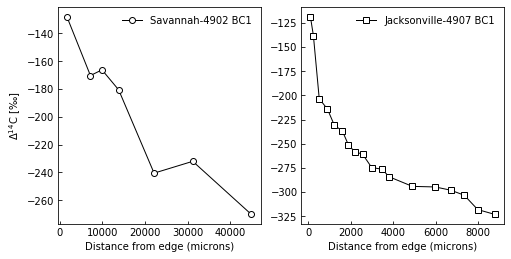

In [36]:
mpl.rc('font',family='Helvetica')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))
ax1.plot('Distance microns', 'D14C', data=sav, label = "Savannah-4902 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', 'D14C', data=jack4907, label = "Jacksonville-4907 BC1",marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)

ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (microns)')

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_ancient.png', dpi = 300, bbox_inches = 'tight')

In [31]:
stetson = stetson.dropna(subset=['14C Age'])

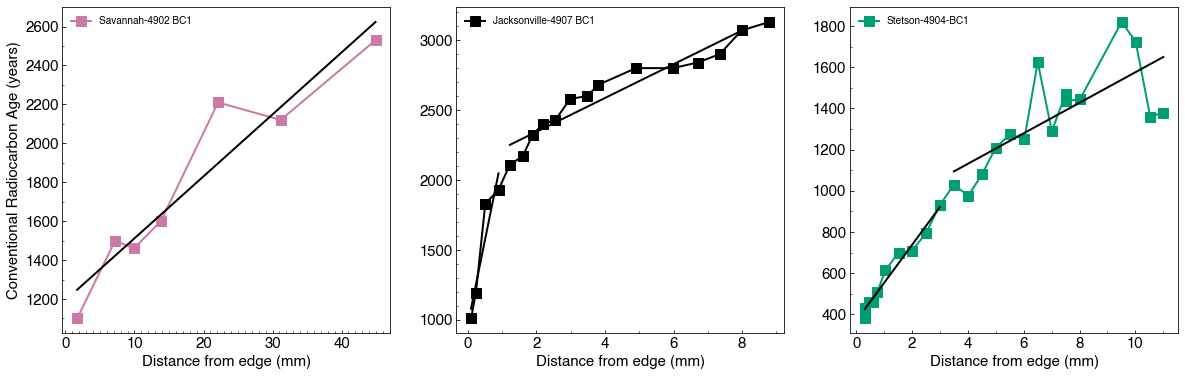

In [36]:
mpl.rc('font',family='Helvetica')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))
markerfacecolor = 'white'
linestyle = '-'
markersize = 10
ax1.plot('distance', '14C Age', data=sav, label = "Savannah-4902 BC1",marker = "s", color = '#CC79A7', 
         linestyle = linestyle, linewidth = 2, markersize = markersize)
ax2.plot('distance', '14C Age', data=jack4907, label = "Jacksonville-4907 BC1",marker = "s", color = '#000000', 
         linestyle = linestyle, linewidth = 2, markersize = markersize)
ax3.plot('distance', '14C Age', data=stetson, label = "Stetson-4904-BC1",marker = "s", color = '#009E73', 
         linestyle = linestyle, linewidth = 2, markersize = markersize)

# ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]", size = 15)
ax1.set_ylabel('Conventional Radiocarbon Age (years)', size = 15)
ax1.set_xlabel('Distance from edge (mm)',size = 15)
x = sav['distance']
y = sav['14C Age']
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax1.plot(x, yp, color = 'black', linewidth = 2)

ax2.set_xlabel('Distance from edge (mm)', size = 15)
x = jack4907['distance'][0:4]
y = jack4907['14C Age'][0:4]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax2.plot(x, yp, color = 'black', linewidth = 2)

x = jack4907['distance'][4:17]
y = jack4907['14C Age'][4:17]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax2.plot(x, yp, color = 'black', linewidth = 2)

ax3.set_xlabel('Distance from edge (mm)', size = 15)
x = stetson['distance'][0:10]
y = stetson['14C Age'][0:10]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax3.plot(x, yp, color = 'black', linewidth = 2)

x = stetson['distance'][10:27]
y = stetson['14C Age'][10:27]
(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax3.plot(x, yp, color = 'black', linewidth = 2)

ax1.tick_params(direction='in', which = 'both')
ax2.tick_params(direction='in', which = 'both')
ax3.tick_params(direction='in', which = 'both')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)
ax3.legend(frameon=False, loc = 0)

size1 = 15
for tick in ax1.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax2.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax3.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax3.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)

xminor = 1
yminor = 100

ax1.xaxis.set_minor_locator(MultipleLocator(xminor))
ax1.yaxis.set_minor_locator(MultipleLocator(yminor))
ax2.xaxis.set_minor_locator(MultipleLocator(xminor))
ax2.yaxis.set_minor_locator(MultipleLocator(yminor))
ax3.xaxis.set_minor_locator(MultipleLocator(xminor))
ax3.yaxis.set_minor_locator(MultipleLocator(yminor))

plt.savefig('fig_d14c_results_multiple_regressions.png', dpi = 400, bbox_inches = 'tight')

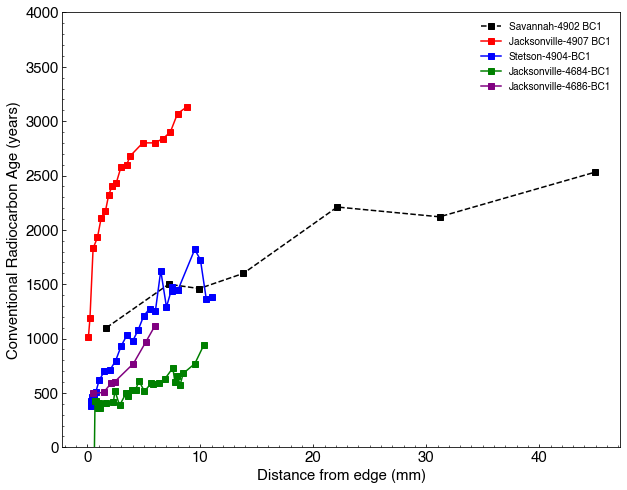

In [11]:
mpl.rc('font',family='Helvetica')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)


linestyle = '--'

ax.plot('distance', '14C Age', data=sav, label = "Savannah-4902 BC1", marker = "s", color = 'k', linestyle = '--')
ax.plot('distance', '14C Age', data=jack4907, label = "Jacksonville-4907 BC1",marker = "s", color = 'red')
ax.plot('distance', '14C Age', data=stetson, label = "Stetson-4904-BC1",marker = "s", color = 'blue')
ax.plot('distance', '14C Age', data=jack4684, label = "Jacksonville-4684-BC1",marker = "s", color = 'green')
ax.plot('distance', '14C Age', data=jack4686, label = "Jacksonville-4686-BC1",marker = "s", color = 'purple')
# ax.plot('distance', '14C Age', data=jack4686, label = "Jacksonville-4686-BC1",marker = "s", color = 'k', 
#          markerfacecolor = 'green', linestyle = linestyle, linewidth = 1, markersize = 9)

# ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]", size = 15)
ax.set_ylabel('Conventional Radiocarbon Age (years)', size = 15)
ax.set_xlabel('Distance from edge (mm)',size = 15)
# x = sav['distance']
# y = sav['14C Age']
# (m, b) = np.polyfit(x, y, 1)
# yp = np.polyval([m, b], x)

# ax.plot(x, yp, color = 'black', linewidth = 2)
ax.tick_params(direction='in', which = 'both')
ax.tick_params(direction='in', which = 'both')
ax.tick_params(direction='in', which = 'both')

ax.legend(frameon=False, loc = 0)
ax.legend(frameon=False, loc = 0)
ax.legend(frameon=False, loc = 0)

ax.set_ylim(0,4000)

size1 = 15
for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(size1)
xminor = 1
yminor = 100

ax.xaxis.set_minor_locator(MultipleLocator(xminor))
ax.yaxis.set_minor_locator(MultipleLocator(yminor))

# plt.savefig('fig_d14c_results_multiple_regressions.png', dpi = 300, bbox_inches = 'tight')

## Age Model Comparisons

In [4]:
path1 = '~/Documents/GitHub/data/schiff_bulk_years_06-28-2020.csv'
df = pd.read_csv(path1, comment = '#')
df.rename(columns={"d15n.vs.air": "d15n", "d13c.vs.vpdb": "d13c", "linear.ad" : "yrAD", 
                   "coral.id" : "coral", "sample.no." : "sample",
                  "secondary.ad" : "yrAD2", "distance..mm." : "distance"}, inplace = True)

# Round yrAD column to make things easier
df.yrAD = df.yrAD.round(0)

df_stet = df[df.coral == 'stet-4904-bc1-d2']
df_jack4907 = df[df.coral == 'jack-4907-bc1-d3']
df_jack_usgs = df[df.coral == 'jack-4907-bc1-d1']
df_sav = df[df.coral == 'sav-4902-bc1-unk']
df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
df_jack4686 = df[df.coral == 'jack-4686-bc1-d1-t1']
df_jack4686_mill = df[df.coral == 'jack-4686-bc-d1-t1']

In [22]:
df_jack4907.info()
linear_test = df_jack4907
linear_test['linear'] = 1461 - (linear_test['distance'].shift(1)/0.0054)
linear_test['up'] = 1461 - (linear_test['distance'].shift(1)/(0.0054-0.0015))
linear_test['down'] = 1461 - (linear_test['distance'].shift(1)/(0.0054+0.0015))
linear_test.set_value(0, 'linear', 1461)
linear_test.set_value(0, 'up', 1461)
linear_test.set_value(0, 'down', 1461)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 317
Data columns (total 20 columns):
coral          318 non-null object
sampler        318 non-null object
sample         318 non-null int64
distance       318 non-null float64
d15n           318 non-null float64
d13c           318 non-null float64
treatment      318 non-null object
perc.n         0 non-null float64
perc.c         0 non-null float64
cn.ratio       310 non-null float64
machine        312 non-null object
yrAD           318 non-null int64
Unnamed: 12    25 non-null float64
Unnamed: 13    74 non-null float64
Unnamed: 14    219 non-null float64
Unnamed: 15    0 non-null float64
Unnamed: 16    0 non-null float64
linear         318 non-null float64
rolling        299 non-null float64
Diff           318 non-null float64
dtypes: float64(14), int64(2), object(4)
memory usage: 62.2+ KB


/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,coral,sampler,sample,distance,d15n,d13c,treatment,perc.n,perc.c,cn.ratio,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,linear,rolling,Diff,up,down
0,jack-4907-bc1-d3,john,1,0.032,9.43,-15.24,a,NaN,NaN,2.3,...,1461.0,NaN,NaN,NaN,NaN,1461.000000,NaN,1461.000000,1461.000000,1461.000000
1,jack-4907-bc1-d3,john,2,0.064,9.78,-15.38,a,NaN,NaN,NaN,...,1381.0,NaN,NaN,NaN,NaN,1455.074074,NaN,1455.074074,1452.794872,1456.362319
2,jack-4907-bc1-d3,john,3,0.096,9.41,-15.14,a,NaN,NaN,2.7,...,1341.0,NaN,NaN,NaN,NaN,1449.148148,NaN,1449.148148,1444.589744,1451.724638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,jack-4907-bc1-d3,john,316,10.112,7.31,-16.87,a,NaN,NaN,2.6,...,NaN,NaN,-872.0,NaN,NaN,-405.666667,NaN,-405.666667,-1123.615385,0.130435
316,jack-4907-bc1-d3,john,317,10.144,7.19,-17.65,a,NaN,NaN,2.6,...,NaN,NaN,-875.0,NaN,NaN,-411.592593,NaN,-411.592593,-1131.820513,-4.507246
317,jack-4907-bc1-d3,john,318,10.176,7.30,-17.29,a,NaN,NaN,2.6,...,NaN,NaN,-878.0,NaN,NaN,-417.518519,NaN,-417.518519,-1140.025641,-9.144928


/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

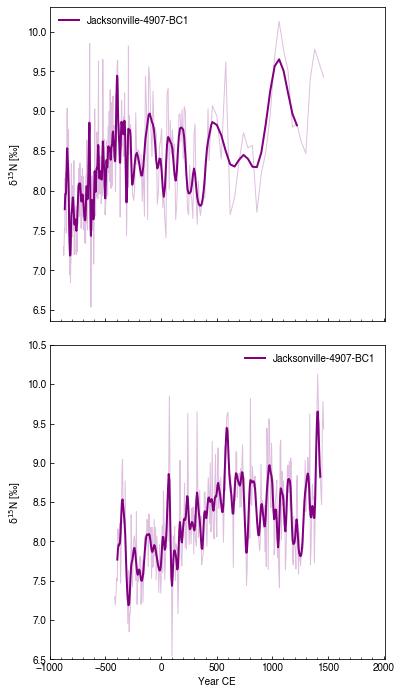

In [21]:
linear_test = df_jack4907
linear_test['linear'] = 1461 - (linear_test['distance'].shift(1)/0.0054)
linear_test['up'] = 1461 - (linear_test['distance'].shift(1)/(0.0054-0.0015))
linear_test['down'] = 1461 - (linear_test['distance'].shift(1)/(0.0054+0.0015))
linear_test.set_value(0, 'linear', 1461)
linear_test.set_value(0, 'up', 1461)
linear_test.set_value(0, 'down', 1461)

fig, axs = plt.subplots(2, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')

alpha = 0.25
window = 15
windowtype = 'blackman'
window = 10

data = linear_test
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
axs[0].plot('yrAD', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')
# axs[0].plot(data['yrAD']+100, 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')
# axs[0].plot(data['yrAD']-100, 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')

data = linear_test
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
axs[1].plot('linear', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
# axs[1].plot('up', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
# axs[1].plot('down', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
axs[1].plot('linear', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
# axs[1].set_ylim(7,10.5)
axs[1].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[0].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(-1000,2010)
axs[1].set_ylim(6.5,10.5)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

plt.savefig('fig_jack4907_agemodel_comparison_d15n.png', dpi = 300, bbox_inches = 'tight')

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

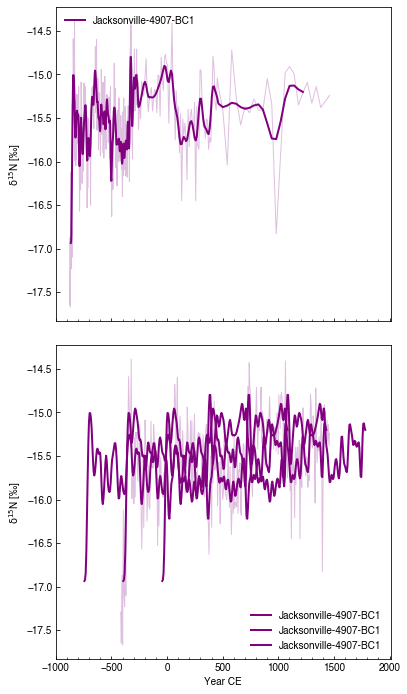

In [16]:
linear_test = df_jack4907
linear_test['linear'] = 1461 - (linear_test['distance'].shift(1)/0.0054)
linear_test['up'] = 1461 - (linear_test['distance'].shift(1)/(0.0054-0.0015))
linear_test['down'] = 1461 - (linear_test['distance'].shift(1)/(0.0054+0.0015))
linear_test.set_value(0, 'linear', 1461)
linear_test.set_value(0, 'up', 1461)
linear_test.set_value(0, 'down', 1461)

fig, axs = plt.subplots(2, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')

string = 'd13c'
alpha = 0.25
window = 15
windowtype = 'blackman'
window = 10

data = linear_test
data.loc[:,'rolling'] = data[string].rolling(window, win_type= windowtype, center = True).mean()
axs[0].plot('yrAD', string, data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')
# axs[0].plot(data['yrAD']+100, 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')
# axs[0].plot(data['yrAD']-100, 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')

data = linear_test
data.loc[:,'rolling'] = data[string].rolling(window, win_type= windowtype, center = True).mean()
axs[1].plot('linear', string, data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
# axs[1].plot('up', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
# axs[1].plot('down', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
axs[1].plot('linear', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')
axs[1].plot(data['linear']-350, 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')
axs[1].plot(data['linear']+350, 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4907-BC1')

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
# axs[1].set_ylim(7,10.5)
axs[1].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[0].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(-1000,2010)
# axs[1].set_ylim(6.5,10.5)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

# plt.savefig('fig_sst_bulk_comparison.png', dpi = 300, bbox_inches = 'tight')

In [29]:
linear_test = df_stet
linear_test['linear'] = 2005 - (linear_test['distance'].shift(1)/0.0086)
linear_test['up'] = 2005 - (linear_test['distance'].shift(1)/(0.0086-0.0015))
linear_test['down'] = 2005 - (linear_test['distance'].shift(1)/(0.0086+0.0015))

linear_test.reset_index(inplace = True, drop = True)
linear_test.set_value(0, 'linear', 2005)
linear_test.set_value(0, 'up', 2005)
linear_test.set_value(0, 'down', 2005)

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,coral,sampler,sample,distance,d15n,d13c,treatment,perc.n,perc.c,cn.ratio,machine,yrAD,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,linear,up,down
0,stet-4904-bc1-d2,john,1.0,0.030,9.240000,-16.910000,a,NaN,NaN,NaN,NaN,2005.0,2005.0,1385.0,NaN,NaN,0.006,2005.000000,2005.000000,2005.000000
1,stet-4904-bc1-d2,john,2.0,0.059,9.240000,-16.840000,a,NaN,NaN,NaN,NaN,1995.0,1995.0,1382.0,NaN,NaN,0.017,2001.511628,2000.774648,2002.029703
2,stet-4904-bc1-d2,john,3.0,0.088,9.630000,-16.910000,b,NaN,NaN,NaN,delta v plus,1990.0,1990.0,1380.0,NaN,NaN,NaN,1998.139535,1996.690141,1999.158416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,stet-4904-bc1-d2,john,385.0,11.166,7.170000,-16.790000,a,NaN,NaN,NaN,delta v plus,728.0,NaN,728.0,NaN,NaN,NaN,710.000000,436.408451,902.326733
385,stet-4904-bc1-d2,john,386.0,11.195,7.118105,-16.582813,NaN,NaN,NaN,2.95,delta v plus,726.0,NaN,726.0,NaN,NaN,NaN,706.627907,432.323944,899.455446
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,703.255814,428.239437,896.584158


/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

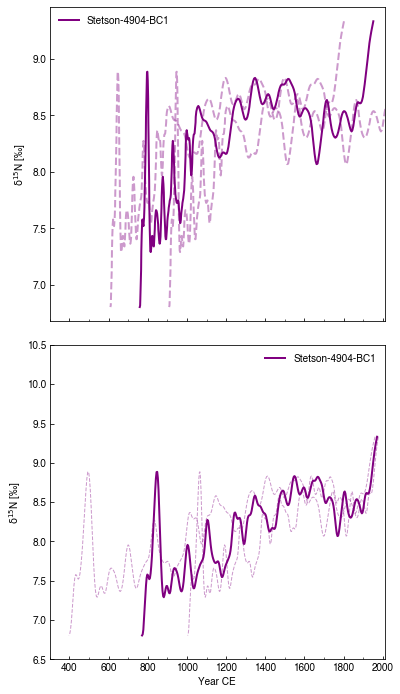

In [19]:
linear_test = df_stet
linear_test['linear'] = 2005 - (linear_test['distance'].shift(1)/0.0086)
linear_test['up'] = 2005 - (linear_test['distance'].shift(1)/(0.0086-0.002))
linear_test['down'] = 2005 - (linear_test['distance'].shift(1)/(0.0086+0.002))

linear_test.reset_index(inplace = True, drop = True)
linear_test.set_value(0, 'linear', 2005)
linear_test.set_value(0, 'up', 2005)
linear_test.set_value(0, 'down', 2005)

fig, axs = plt.subplots(2, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')

alpha = 0.4
windowtype = 'blackmanharris'
window = 20

data = linear_test
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
# axs[0].plot('yrAD', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Stetson-4904-BC1')
axs[0].plot(data['yrAD']+150, 'rolling', data=data, color = 'purple', linestyle = '--', linewidth = 2, label = '',alpha = alpha)
axs[0].plot(data['yrAD']-150, 'rolling', data=data, color = 'purple', linestyle = '--', linewidth = 2, label = '',alpha = alpha)

data = linear_test
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
# axs[1].plot('linear', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[1].plot('up', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
axs[1].plot('down', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
axs[1].plot('linear', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Stetson-4904-BC1')

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
# axs[1].set_ylim(7,10.5)
axs[1].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[0].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(300,2010)
axs[1].set_ylim(6.5,10.5)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

plt.savefig('fig_stet_agemodel_comparison_d15n.png', dpi = 300, bbox_inches='tight')

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

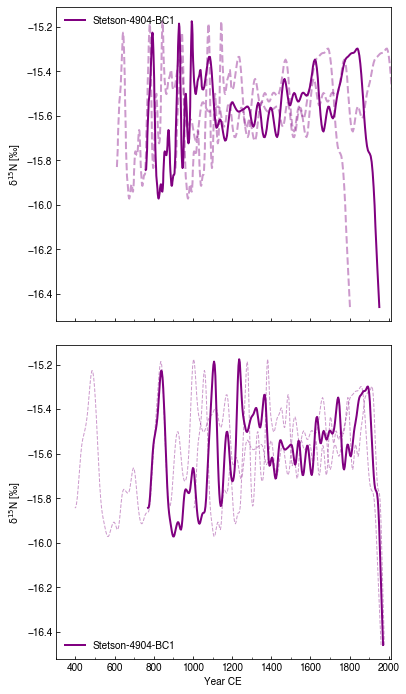

In [20]:
linear_test = df_stet
linear_test['linear'] = 2005 - (linear_test['distance'].shift(1)/0.0086)
linear_test['up'] = 2005 - (linear_test['distance'].shift(1)/(0.0086-0.002))
linear_test['down'] = 2005 - (linear_test['distance'].shift(1)/(0.0086+0.002))

linear_test.reset_index(inplace = True, drop = True)
linear_test.set_value(0, 'linear', 2005)
linear_test.set_value(0, 'up', 2005)
linear_test.set_value(0, 'down', 2005)

fig, axs = plt.subplots(2, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')

alpha = 0.4
windowtype = 'blackmanharris'
window = 20

data = linear_test
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True).mean()
# axs[0].plot('yrAD', 'd13c', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Stetson-4904-BC1')
axs[0].plot(data['yrAD']+150, 'rolling', data=data, color = 'purple', linestyle = '--', linewidth = 2, label = '',alpha = alpha)
axs[0].plot(data['yrAD']-150, 'rolling', data=data, color = 'purple', linestyle = '--', linewidth = 2, label = '',alpha = alpha)

data = linear_test
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True).mean()
# axs[1].plot('linear', 'd13c', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[1].plot('up', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
axs[1].plot('down', 'rolling', data=data, color = 'purple', linewidth = 1, label = '', linestyle='--',alpha = alpha)
axs[1].plot('linear', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Stetson-4904-BC1')

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
# axs[1].set_ylim(7,10.5)
axs[1].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[0].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(300,2010)
# axs[1].set_ylim(6.5,10.5)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

plt.savefig('fig_stet_agemodel_comparison_d13c.png', dpi = 300, bbox_inches='tight')

In [4]:
x = [[1.2, 2.3, 3.0, 4.5],
     [1.1, 2.2, 2.9, 5.0]]
df = pd.DataFrame(x, index=['Age of pregnant women', 'Age of pregnant men'])
df

,0,1,2,3
Age of pregnant women,1.2,2.3,3.0,4.5
Age of pregnant men,1.1,2.2,2.9,5.0


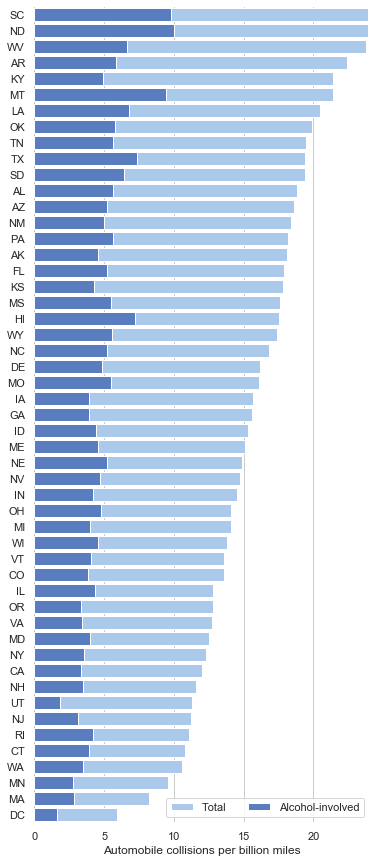

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)


In [7]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
...,...,...,...,...,...,...,...,...
23,9.6,2.208,2.784,8.448,8.448,777.18,133.35,MN
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC


/Users/jts/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


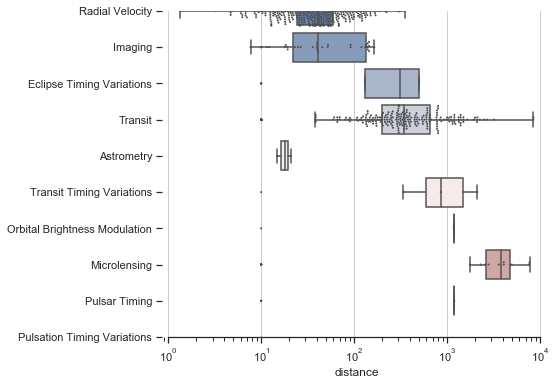

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


In [10]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
...,...,...,...,...,...,...
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008
1034,Transit,1,4.187757,NaN,260.00,2008
